In [1]:
# setup environment
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.utils import resample
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

input_path = './data/'
loans_income = pd.read_csv(input_path + 'loans_income.csv')\
    .squeeze() # read in as a Series
sp500_px = pd.read_csv(input_path + 'sp500_data.csv.gz',
                         compression='gzip')
sp500_px.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
sp500_px['Date'] = pd.to_datetime(sp500_px['Date'])
sp500_px.set_index('Date', inplace=True)

# 2 Data and Sampling Distributions
# 2.1 Random Sampling and Sample Bias

#### <p style="text-align: center;">Key Terms for Random Sampling</p>

- ***Sample***  
A subset from a larger data set.
- ***Population***  
The larger data set or idea of a data set.
- ***N (n)***  
The size of the population (sample).
- ***Random sampling***  
Drawing elements into a sample at random.
- ***Stratified sampling***  
Dividing the population into strata and randomly sampling from each strata.
- ***Stratum (pl., strata)***  
A homogeneous subgroup of a population with common characteristics.
- ***Simple random sample***  
The sample that results from random sampling without stratifying the population.
- ***Bias***  
Systematic error.
- ***Sample bias***  
A sample that misrepresents the population.

Sampling can be done ***with replacement***, in which observations are put back in the population after each draw for possible future reselection. Or it can be done ***without replacement***, in which case observations, once selected, are unavailable for future draws.

Data quality often matters more than data quantity when making an estimate or a model based on a sample. Data quality in data science involves completeness, consistency of format, cleanliness, and accuracy of individual data points. Statistics adds the notion of ***representativeness***.

**Self-Selection Sampling Bias**  
- The reviews of restaurants, hotels, cafés, and so on that you read on social media sites like Yelp are prone to bias because the people submitting them are not randomly selected; rather, they themselves have taken the initiative to write. This leads to self-selection biasthe people motivated to write reviews may have had poor experiences, may have an association with the establishment, or may simply be a different type of person from those who do not write reviews. Note that while self-selection samples can be unreliable indicators of the true state of affairs, they may be more reliable in simply comparing one establishment to a similar one; the same self-selection bias might apply to each.

### Sample Mean Versus Population Mean

The symbol $\bar x$ (pronounced “x-bar”) is used to represent the mean of a sample from a population, whereas $\mu$ is used to represent the mean of a population. The difference between them is a kind of sampling bias.

## 2.2 Selection Bias

#### <p style="text-align: center;">Key Terms for Selection Bias</p>

- ***Selection bias***  
Bias resulting from the way in which observations are selected.
- ***Data snooping***  
Extensive hunting through data in search of something interesting.
- ***Vast search effect***  
Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

The key concept here is that if you do data snooping on a large dataset, you will always find some patterns, though they may or may not be true representation of the population. This is vast search effect, which is similar to model overfitting effect.

We can guard against this by using a holdout set, and sometimes more than one holdout set, against which to validate performance. Elder also advocates the use of what he calls ***target shuffling*** (a permutation test, in essence) to test the validity of predictive associations that a data mining model suggests.

### Regression to the Mean

*Regression to the mean* refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. Attaching special focus and meaning to the extreme value can lead to a form of selection bias.

## 2.3 Sampling Distribution of a Statistic

#### <p style="text-align: center;">Key Terms for Sampling Distribution</p>

- ***Sample statistic***  
A metric calculated for a sample of data drawn from a larger population.
- ***Data distribution***  
The frequency distribution of individual values in a data set.
- ***Sampling distribution***  
The frequency distribution of a sample statistic over many samples or resamples.
- ***Central limit theorem***  
The tendency of the sampling distribution to take on a normal shape as sample size rises, even if the source population is not normally distributed.
- ***Standard error***  
The variability (standard deviation) of a sample statistic over many samples (not to be confused with *standard deviation*, which by itself, refers to variability of individual data *values*).

It is important to distinguish between the distribution of the indi‐
vidual data points, known as the ***data distribution***, and the distribu‐
tion of a sample statistic, known as the ***sampling distribution***.

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic.

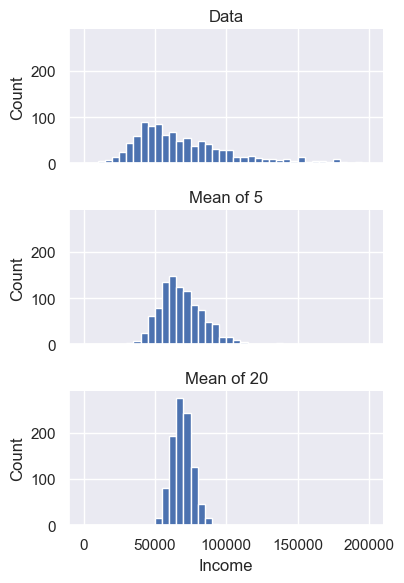

In [2]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000, replace=True),
    'type': 'Data'
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5, replace=True).mean() for i in range(1000)],
    'type': 'Mean of 5'
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20, replace=True).mean() for i in range(1000)],
    'type': 'Mean of 20'
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20], axis=0)
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200_000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.show()

Above is an example using annual income for loan applicants to Lending Club, showing the distribution of three samples from this data:  
1. A sample of 1,000 values.
2. A sample of 1,000 means of 5 values.
3. A sample of 1,000 means of 20 values.

The histogram of the individual data values is broadly spread out and skewed toward higher values, as is to be expected with income data. The histograms of the means of 5 and 20 are increasingly compact and more bell-shaped. This phenomenon is termed the ***central limit theorem***.

### Standard Error

The *standard error* is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation $s$ of the sample values, and the sample size $n$:  
$$\text{Standard error}=SE=\frac{s}{\sqrt n}$$

Consider the following approach to measuring standard error:  
1. Collect a number of brand-new samples from the population.
2. For each new sample, calculate the statistic (e.g., mean).
3. Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

Let's calculate the SE of above loan applicants income samples:  
1. A sample of 1,000 values ($n=1$).

In [3]:
s = sample_data['income'].std()
n = 1
SE = s / np.sqrt(n)
print(f' s = {s:,.2f}')
print(f' n = {n}')
print(f'SE = {SE:,.2f}')

 s = 34,708.70
 n = 1
SE = 34,708.70


2. A sample of 1,000 means of 5 values ($n=5$).

In [4]:
s = sample_mean_05['income'].std()
n = 5
SE = s / np.sqrt(n)
print(f' s = {s:,.2f}')
print(f' n = {n}')
print(f'SE = {SE:,.2f}')

 s = 14,954.06
 n = 5
SE = 6,687.66


3. A sample of 1,000 means of 20 values ($n=20$).

In [5]:
s = sample_mean_20['income'].std()
n = 20
SE = s / np.sqrt(n)
print(f' s = {s:,.2f}')
print(f' n = {n}')
print(f'SE = {SE:,.2f}')

 s = 7,057.79
 n = 20
SE = 1,578.17


In [6]:
summary = {'n': [],          # sample size
           'num_sample': [], # number of samples
           's': [],          # std of sample mean
           'SE': []}         # standard error
for num_sample in [2, 10, 1000]:
    for n in range(1, 21, 1):
        summary['n'].append(n)
        summary['num_sample'].append(num_sample)
        sample_means = \
            [loans_income.sample(n, replace=True).mean() for i in range(num_sample)]
        s = np.std(sample_means, ddof=1)
        SE = s / np.sqrt(n)
        summary['s'].append(s)
        summary['SE'].append(SE)
summary_df = pd.DataFrame(summary)


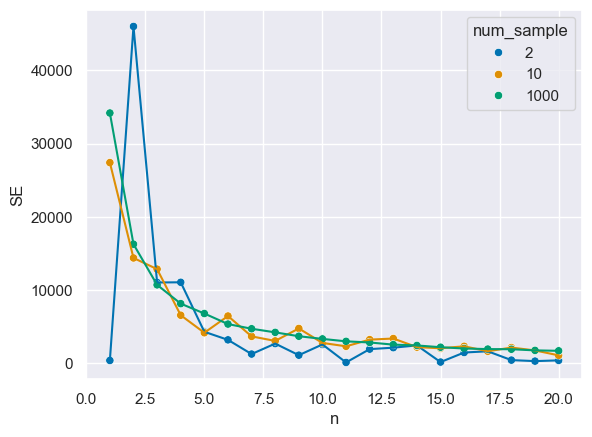

In [7]:
sns.scatterplot(summary_df, x='n', y='SE', 
                hue='num_sample', palette='colorblind')
sns.lineplot(summary_df, x='n', y='SE',
             hue='num_sample', palette='colorblind', legend=False)
plt.xlim(0, 21)
plt.show()

As shown above, $SE$ is mainly determined by $n$, higher number of samples will smooth the curve so we can estimate $SE$ more accurately.

In practice, this approach of collecting new samples to estimate the standard error is typically not feasible (and statistically very wasteful). Fortunately, it turns out that it is not necessary to draw brand new samples; instead, you can use ***bootstrap*** resamples.

**Standard Deviation Versus Standard Error**  
- Do not confuse standard deviation (which measures the variability of individual data points) with standard error (which measures the variability of a sample metric).

## 2.4 The Bootstrap

#### <p style="text-align: center;">Key Terms for the Bootstrap</p>

- ***Bootstrap sample***  
A sample taken with replacement from an observed data set.
- ***Resampling***  
The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

The algorithm for a bootstrap resampling of the mean, for a sample of size $n$, is as follows:  
1. Draw a sample value, record it, and then replace it.
2. Repeat $n$ times.
3. Record the mean of the $n$ resampled values.
4. Repeat steps 1–3 $R$ times.
5. Use the $R$ results to:
    - Calculate their standard deviation (this estimates sample mean standard error).
    - Produce a histogram or boxplot.
    - Find a confidence interval.

In [8]:
results = []
for n in range(1000):
    sample = resample(loans_income)
    # resample is from sklearn.utils
    # here we resample with replacement, same length as population
    results.append(sample.median())
results = pd.Series(results)
print('Boostrap Statistics (median):')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}') # note: only 1 sample here

Boostrap Statistics (median):
original: 62000.0
bias: -67.1449999999968
std. error: 198.4021002115858


The bootstrap can be used with multivariate data, where the rows are sampled as units. A model might then be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve predictive power. With classification and regression trees (also called *decision trees*), running multiple trees on bootstrap samples and then averaging their predictions (or, with classification, taking a majority vote) generally performs better than using a single tree. This process is called *bagging* (short for “bootstrap aggregating”).

## 2.5 Confidence Intervals

#### <p style="text-align: center;">Key Terms for Confidence Intervals</p>

- ***Confidence level***  
The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.
- ***Interval endpoints***  
The top and bottom of the confidence interval.

One way to think of a 90% confidence interval is as follows: it is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).

Two ways to ***compute confidence interval***:  
1. ***Bootstrap resampling*** many time to get sample statistic distribution, then find interval endpoints by trim [(100-x)/2]% of the results from each end.
2. Find the confidence interval by ***formulas***, espeically the ***t-distribution***.

## 2.6 Normal Distribution

#### <p style="text-align: center;">Key Terms for Normal Distribution</p>

- ***Error***  
The difference between a data point and a predicted or average value.
- ***Standardize***  
Subtract the mean and divide by the standard deviation.
- ***z-score***  
The result of standardizing an individual data point.
- ***Standard normal***  
A normal distribution with mean = 0 and standard deviation = 1.
- ***QQ-Plot***  
A plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution.

In a normal distribution, 68% of the data lies within one standard deviation of the mean, 95% lies within two standard deviations, and 99.7% lies within three standard deviations.

The **QQ-Plot** orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. 

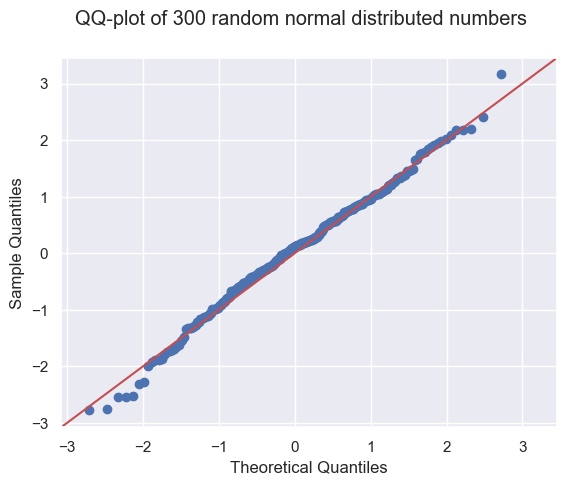

In [9]:
norm_sample = np.random.normal(size=300) # random numbers with standard normal distribution
sm.qqplot(norm_sample, line='45')
plt.suptitle('QQ-plot of 300 random normal distributed numbers')
plt.show()

## 2.7 Long-Tailed Distributions

#### <p style="text-align: center;">Key Terms for Long-Tailed Distributions</p>

- ***Tail***  
The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.
- ***Skew***  
Where one tail of a distribution is longer than the other.

A good example to illustrate the long-tailed nature of data is stock returns. Below plots show histogram and the QQ-Plot for the daily stock returns for Netflix (NFLX).

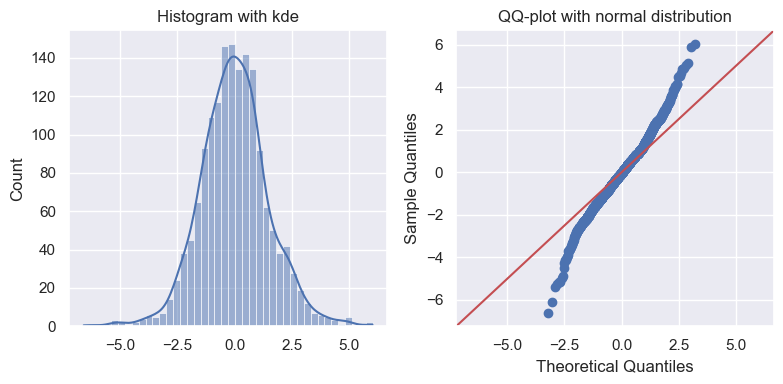

In [10]:
nflx = sp500_px['NFLX']
nflx = np.diff(np.log(nflx[nflx>0]))

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
sns.histplot(x=nflx,kde=True, ax=axs[0])
sm.qqplot(nflx, line='45', ax=axs[1])
axs[0].set_title('Histogram with kde')
axs[1].set_title('QQ-plot with normal distribution')
fig.tight_layout()
plt.show()

## 2.8 Student’s t-Distribution

The *t-distribution* is a normally shaped distribution, except that it is a bit thicker and longer on the tails. It is used extensively in depicting distributions of sample statistics. Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution becomes.

#### <p style="text-align: center;">Key Terms for Student’s t-Distribution</p>

- ***n***  
Sample size.
- ***Degrees of freedom***  
A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups.

Consider a sample of size $n$ for which the sample mean $\bar x$ has been calculated. If $s$ is the sample standard deviation, a 90% confidence interval around the sample mean is given by:  
$$\bar x\pm t_{n-1}(0.05)\cdot \frac{s}{\sqrt n}$$  
where $t_{n-1}(0.05)$ is the value of the t-statistic, with $(n-1)$ degrees of freedom and 5% "chop off" at either end (total 10% chop off, consistent with 90% confidence level).

## 2.9 Binominal Distribution

#### <p style="text-align: center;">Key Terms for Binomial Distribution</p>

- ***Trial***  
An event with a discrete outcome (e.g., a coin flip).
- ***Success***  
The outcome of interest for a trial.<br>  
*Synonym*
    - “1” (as opposed to “0”)
- ***Binomial***  
Having two outcomes.<br>  
*Synonym*
    - yes/no, 0/1, binary
- ***Binomial trial***  
A trial with two outcomes.<br>  
*Synonym*
    - Bernoulli trial
- ***Binomial distribution***  
Distribution of number of successes in x trials.<br>  
*Synonym*
    - Bernoulli distribution

The binomial distribution is the frequency distribution of the number of successes ($x$) in a given number of trials ($n$) with specified probability ($p$) of success in each trial.

If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [11]:
x, n, p = 0, 200, 0.02
stats.binom.pmf(x, n=n, p=p)
# pmf stands for probability mass function

0.017587946605721567

What is the probability of observing at least 2 sales in 200 clicks?

In [12]:
1 - stats.binom.cdf(1, n=n, p=p)
# cdf stands for cumulative distribution function

0.9106245162280683

With large $n$, and provided $p$ is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution.

## 2.10 Chi-Square Distribution

Definition: --> [Link](https://en.wikipedia.org/wiki/Chi-squared_distribution)

Chi-square distribution is mostly used in Chi-Square Test. More details will be discussed in next Chapter.

**Key Ideas**  
- The chi-square distribution is typically concerned with counts of subjects or items falling into categories.
- The chi-square statistic measures the extent of departure from what you would expect in a null model.

## 2.11 F-Distribution

Definition: --> [Link](https://en.wikipedia.org/wiki/F-distribution)

F-distribution is mostly used in ANOVA Test. More details will be discussed in next Chapter.

**Key Ideas**  
- The F-distribution is used with experiments and linear models involving measured data.
- The F-statistic compares variation due to factors of interest to overall variation.

## 2.12 Poisson and Related Distributions

#### <p style="text-align: center;">Key Terms for Poisson and Related Distributions </p>

- ***Lambda***  
The rate (per unit of time or space) at which events occur.
- ***Poisson distribution***  
The frequency distribution of the number of events in sampled units of time or space.
- ***Exponential distribution***  
The frequency distribution of the time or distance from one event to the next event.
- ***Weibull distribution***  
A generalized version of the exponential distribution in which the event rate is allowed to shift over time.

### Poisson Distributions

If we know on average the number of events happen per unit of time or space is $\lambda$, then the actual number of events happen in a unit of time or space follows *Poisson distribution*.

A common technique is to generate random numbers from a Poisson distribution as part of a queuing simulation. We can use below code to generate 1000 random numbers from a Poisson distribution with $\lambda = 2$.

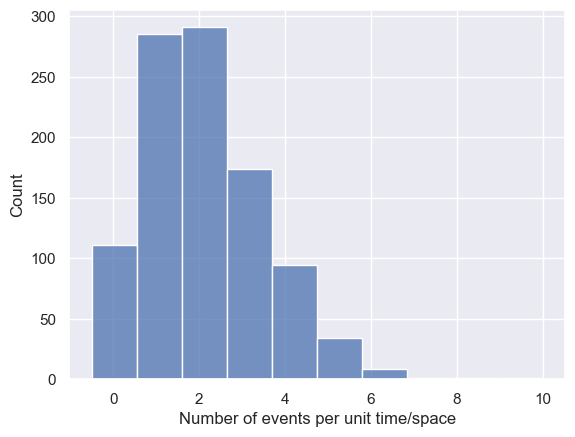

In [19]:
samples = stats.poisson.rvs(2, size=1000)
sns.histplot(x=samples, binwidth=1, binrange=(-0.5, 10))
plt.xlabel('Number of events per unit time/space')
plt.show()

For example, if incoming customer service calls average two per minute, this code will simulate 1000 minutes, returning the number of calls in each of those 1000 minutes.

### Exponential Distribution

Using the same parameter $\lambda$ that we used in the Poisson distribution, we can also model the distribution of the time between events, which is *Exponential distribution*.

Continue above example, if on average there are two calls per minute, let's simulate the interval of two adjacent calls:

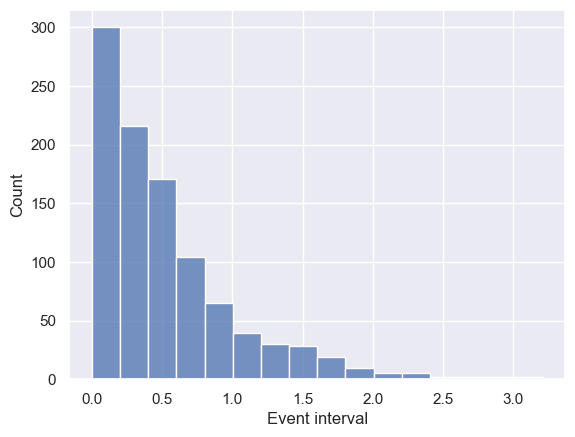

In [20]:
samples = stats.expon.rvs(scale=1/2, size=1000)
sns.histplot(x=samples, binwidth=.2)
plt.xlabel('Event interval')
plt.show()

A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate, $\lambda$, remains constant over the period being considered.

### Estimating the Failure Rate

Sometime the task is to estimate $\lambda$ without enough data, like aircraft engine failure. If there is no failure record of a given engine type, only data available is total running time. In this situation, we can only estimate $\lambda$ to be very low. A ***goodness-of-fit test*** (next Chapter) can be applied to various failure rates to determine how well they fit the observed data.

### Weibull Distribution

If the event rate $\lambda$ is not constant, rather it changes with time, then the event interval will fit ***Weibull distribution*** instead of exponential distribution.

The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter, $β$. If $β > 1$, the probability of an event increases over time; if $β < 1$, the probability decreases. Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is $η$, the Greek letter eta. It is also called the *scale* parameter.

Below code generates 1000 random numbers (lifetimes) from a Weibull distribution with shape of 1.5 and characteristic life of 5,000:

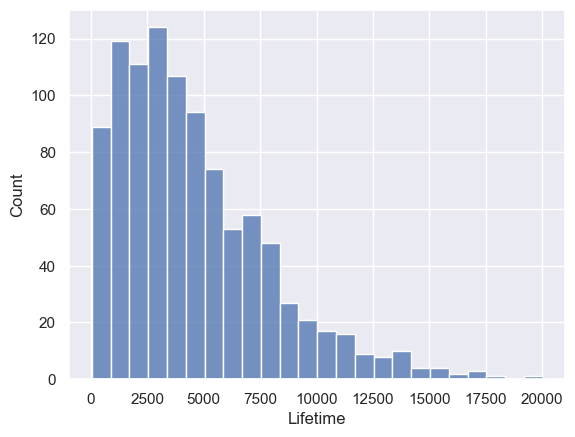

In [25]:
samples = stats.weibull_min.rvs(1.5, scale=5000, size=1000)
sns.histplot(x=samples)
plt.xlabel('Lifetime')
plt.show()

**Summary**  
- For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a ***Poisson distribution***.
- You can also model the time or distance between one event and the next as an ***exponential distribution***.
- A changing event rate over time (e.g., an increasing probability of device failure) can be modeled with the ***Weibull distribution***.